## AQT Compile

In [1]:
import cirq
import cirq_superstaq
import qtrl
import json
import qtrl.configuration

In [2]:
qubits = cirq.LineQubit.range(4, 8)
in_circuit = cirq.Circuit([cirq.H(q) for q in qubits])
in_circuit += cirq.measure(*qubits)
print(in_circuit)

4: ───H───M───
          │
5: ───H───M───
          │
6: ───H───M───
          │
7: ───H───M───


In [3]:
service = cirq_superstaq.Service(
    api_key="""ya29.a0ARrdaM_5IQO8PJVcgv4HYyDoTuKyfg-SBDRfRGOP23MNQKpdCsaBPs6KxhJI_UWaUnEIbytPnVx5hygkxrzLQ0fUMAgLKObdB-slVxHlH3wdnnbE_tN7I4_IQFXWmUiLCkkKrkKMzCyZEk2WKERgsHY0rg2i8A""",
    remote_host= "https://127.0.0.1:5000",
    verbose=True,
)

In [4]:
file = open("Pulses.yaml")
read_pulses = file.read()
file.close()

file2 = open("Variables.yaml")
read_variables = file2.read()
file2.close()

In [5]:
res = service.aqt_configs({'pulses': read_pulses, 'variables': read_variables})

/home/vtomole/venv1/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [6]:
print(res)

{'status': 'Your AQT configuration has been updated'}


In [ ]:
print(json_list)

In [ ]:
compiler_output = service.aqt_compile(in_circuit)

In [6]:
# The output ciruit is optimized. In this case, the Hadamard gates only require one physical (Rx) pulse each.
print(compiler_output.circuit)

4: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───M───
                                       │
5: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───M───
                                       │
6: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───M───
                                       │
7: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───M───


(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 0'}, xlabel='Time (us)'>)

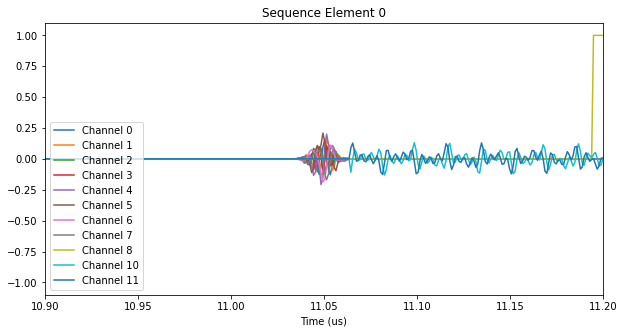

In [7]:
compiler_output.seq.plot(element=0, t_min=10.9e-6, t_max=11.2e-6)